# Think Bayes

This notebook presents example code and exercise solutions for Think Bayes.

Copyright 2018 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Hist, Pmf, Suite, Beta
import thinkplot

## Unreliable observation

Suppose that instead of observing coin tosses directly, you measure the outcome using an instrument that is not always correct. Specifically, suppose there is a probability `y` that an actual heads is reported as tails, or actual tails reported as heads.

Write a class that estimates the bias of a coin given a series of outcomes and the value of `y`.

How does the spread of the posterior distribution depend on `y`?

**Solution:**  
The problem now is that data and coin outcomes are different now, in particular:
* $P(data=T|coin=H) = y$, and therefore $P(data=H|coin=H) = 1-y$
* $P(data=H|coin=T) = y$, and therefore $P(data=T|coin=T) = 1-y$

Given this, if we observe a given data, we then want to compute P(x|data), which is given by Bayes theorem:
$$
P(x|data) = \frac{P(data|x) \times P(x)}{\sum_{x'} ( P(data|x') \times P(x') )}
$$

In the above formula, y enters in P(data|x), i.e. in the Likelihood, as follows:
P(data|x) = 
* if data = H: $P(data=H|coin=H) \times P(coin=H|x) + P(data=H|coin=T) \times P(coin=T|x)$
* if data = T: $P(data=T|coin=H) \times P(coin=H|x) + P(data=T|coin=T) \times P(coin=T|x)$

Inserting the values of the several proability terms, we have P(data|x) (here using $x$ instead of $x/100$):
* if data = H: $(1-y)x + y(1-x)$
* if data = T: $yx + (1-y)(1-x)$

The above probabilty reduce to the simple case studied above if y=0 :)

In [4]:
import numpy as np
class EuroBias(Suite):
    
    def setY(self, y):
        if not ((y >=0) and (y <=1)):
            raise ValueError("y has to be between 0 and 1 (both included)")
        self.y = y
    
    def Likelihood(self, data, hypo):
        
        y = self.y
        x = hypo / 100.
        if data=='H':
            return (1-y)*x + y*(1-x)
        else:
            return y*x + (1-y)*(1-x)

In [35]:
suites = {}
ys = [0.2, 0.5, 0.6, 0.9]

for y in ys:
    key = f'y_{y}'
    suites[key] = EuroBias(range(0,101))
    suites[key].setY(y)

In [38]:
dataset = 'HHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTT'
for k, s in suites.items():
    for data in dataset:
        s.Update(data)

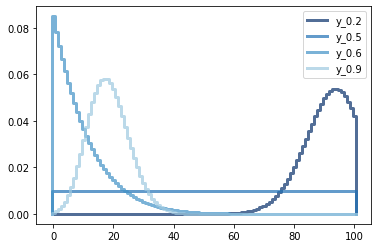

In [39]:
for k, s in suites.items():
    thinkplot.pmf(s, label=k)

thinkplot.config(legend=True)

In [20]:
# Solution goes here

In [21]:
# Solution goes here

## Unreliable evaluators

This exercise is inspired by a question posted by a “redditor” named dominosci on Reddit’s statistics “subreddit” at http://reddit.com/r/statistics.

Reddit is an online forum with many interest groups called subreddits. Users, called redditors, post links to online content and other web pages. Other redditors vote on the links, giving an “upvote” to high-quality links and a “downvote” to links that are bad or irrelevant.

A problem, identified by dominosci, is that some redditors are more reliable than others, and Reddit does not take this into account.

The challenge is to devise a system so that when a redditor casts a vote, the estimated quality of the link is updated in accordance with the reliability of the redditor, and the estimated reliability of the redditor is updated in accordance with the quality of the link.

One approach is to model the quality of the link as the probability of garnering an upvote, and to model the reliability of the redditor as the probability of correctly giving an upvote to a high-quality item.

Write class definitions for redditors and links and an update function that updates both objects whenever a redditor casts a vote.

In [22]:
# Solution goes here

In [23]:
# Solution goes here

In [26]:
# Solution goes here

In [27]:
# Solution goes here

In [29]:
# Solution goes here

In [30]:
# Solution goes here

In [31]:
# Solution goes here

In [32]:
# Solution goes here